In [ ]:
# Displaying 2011 census employment data for the new 2022 wards.

In [1]:
# Dependencies
!pip install geopandas mapclassify

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.4 MB/s 
     |████████████████████████████████| 15.4 MB 133 kB/s 


In [2]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive

Data
==


GDrive mount
--

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
employment_dir = f"{project_dir}/employment"

# Outputs
out_dir = f"{project_dir}/employment/maps"

In [ ]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{oa_dir}"/*lsoa*.gpkg

-rw------- 1 root root 152K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_200m.gpkg
-rw------- 1 root root 216K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_20m.gpkg
-rw------- 1 root root 120K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_centroids.gpkg
-rw------- 1 root root 1.5M Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_full.gpkg


In [ ]:
!ls -lh "{ward_dir}"/*.gpkg

-rw------- 1 root root 292K Nov  1 14:53 /content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/lbl_wd22_proposed.gpkg


In [ ]:
!ls -lh "{employment_dir}" 

total 13M
-rw------- 1 root root 2.0M Nov  2 13:39 census11_economic_activity_oa11_london.csv
-rw------- 1 root root 1.5M Nov  2 13:39 census11_hours_worked_oa11_london.csv
-rw------- 1 root root 7.4M Nov  2 13:38 census11_occupation_minor_groups_oa11_london.csv
-rw------- 1 root root 1.5M Nov  2 13:38 census11_occupation_oa11_london.csv
-rw------- 1 root root 102K Nov 12 15:33 lbl_economic_activity_groups_oa11.csv
-rw------- 1 root root 2.4K Nov 12 15:33 lbl_economic_activity_groups_wd22.csv
-rw------- 1 root root  12K Nov 12 15:33 lbl_economic_activity_lsoa11.csv
-rw------- 1 root root  54K Nov 12 15:33 lbl_economic_activity_oa11.csv
-rw------- 1 root root 2.2K Nov 12 15:33 lbl_economic_activity_wd22.csv
-rw------- 1 root root 6.3K Nov 12 15:33 lbl_hours_worked_lsoa11.csv
-rw------- 1 root root  34K Nov 12 15:33 lbl_hours_worked_oa11.csv
-rw------- 1 root root 1.1K Nov 12 15:33 lbl_hours_worked_wd22.csv
-rw------- 1 root root 7.6K Nov 12 15:33 lbl_occupation_lsoa11.csv
-rw------- 1 r

Ward & LSOA geometry
--

In [5]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

In [6]:
# OA geometry
oa11 = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
len(oa11)

887

At OA level
==
OA data & geometry: economic inactivity
--


In [7]:
ea_oa = pd.read_csv(f"{employment_dir}/lbl_economic_activity_groups_oa11.csv")
print(len(ea_oa))
ea_oa.head()

887


,OA11CD,Full-time,Part-time,Self-employed,Working student,Unemployed,Inactive
0,E00016403,35.622318,17.167382,8.583691,2.575107,11.587983,24.463519
1,E00016437,28.279883,13.702624,5.830904,6.413994,7.288630,38.483965
2,E00016439,36.559140,11.827957,4.659498,6.093190,9.318996,31.541219
3,E00016442,30.909091,18.181818,8.636364,5.454545,13.181818,23.636364
4,E00016399,27.483444,15.562914,3.973510,9.271523,8.278146,35.430464


In [8]:
ea_oa['% Econ. Actives'] = ea_oa[ea_oa.columns[1:-1]].sum(axis=1) # Exclude first and last column
ea_oa[['OA11CD', '% Econ. Actives']].head()

,OA11CD,% Econ. Actives
0,E00016403,75.536481
1,E00016437,61.516035
2,E00016439,68.458781
3,E00016442,76.363636
4,E00016399,64.569536


In [9]:
ea_oa_geom = oa11.merge(ea_oa[['OA11CD', '% Econ. Actives']], on='OA11CD')
print(len(ea_oa_geom))
ea_oa_geom.columns

887


Index(['OBJECTID', 'OA11CD', 'LAD11CD', 'Shape__Are', 'Shape__Len', 'geometry',
       '% Econ. Actives'],
      dtype='object')

Map
--

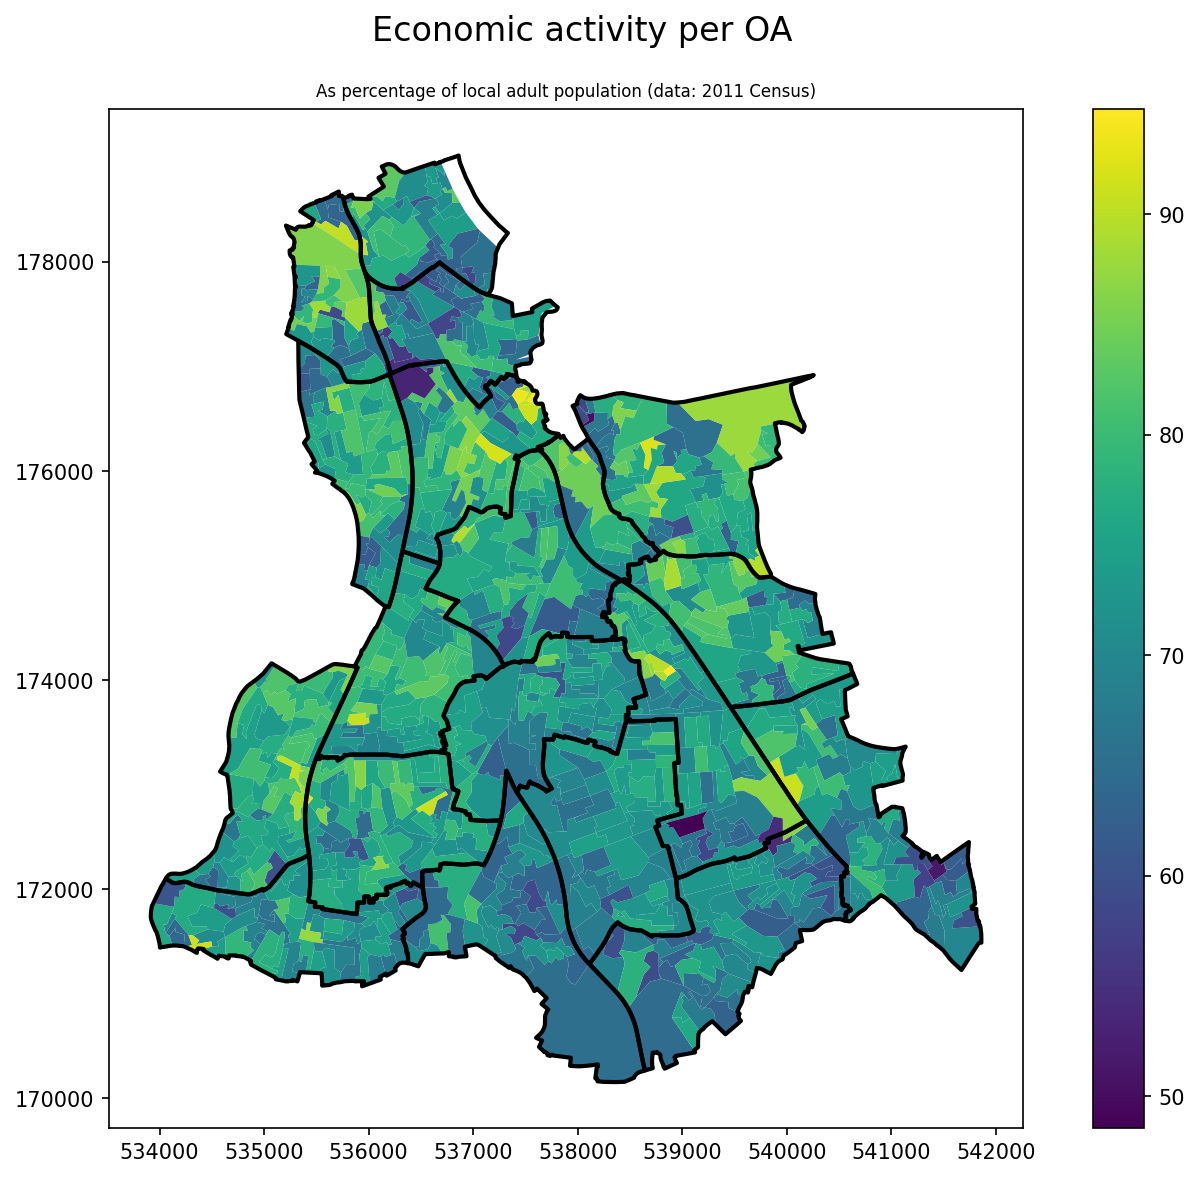

In [10]:
# First just the raw data

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Economic activity per OA', fontsize=16, y=.95)
plt.title('As percentage of local adult population (data: 2011 Census)', fontsize=8)
ea_oa_geom.plot(ax=ax, column='% Econ. Actives', 
              legend=True) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

# plt.savefig(f"{out_dir}/lbl_oa11_wd22_economically_actives.png", dpi=600)
# plt.savefig(f"{out_dir}/lbl_oa11_wd22_economically_actives.pdf")

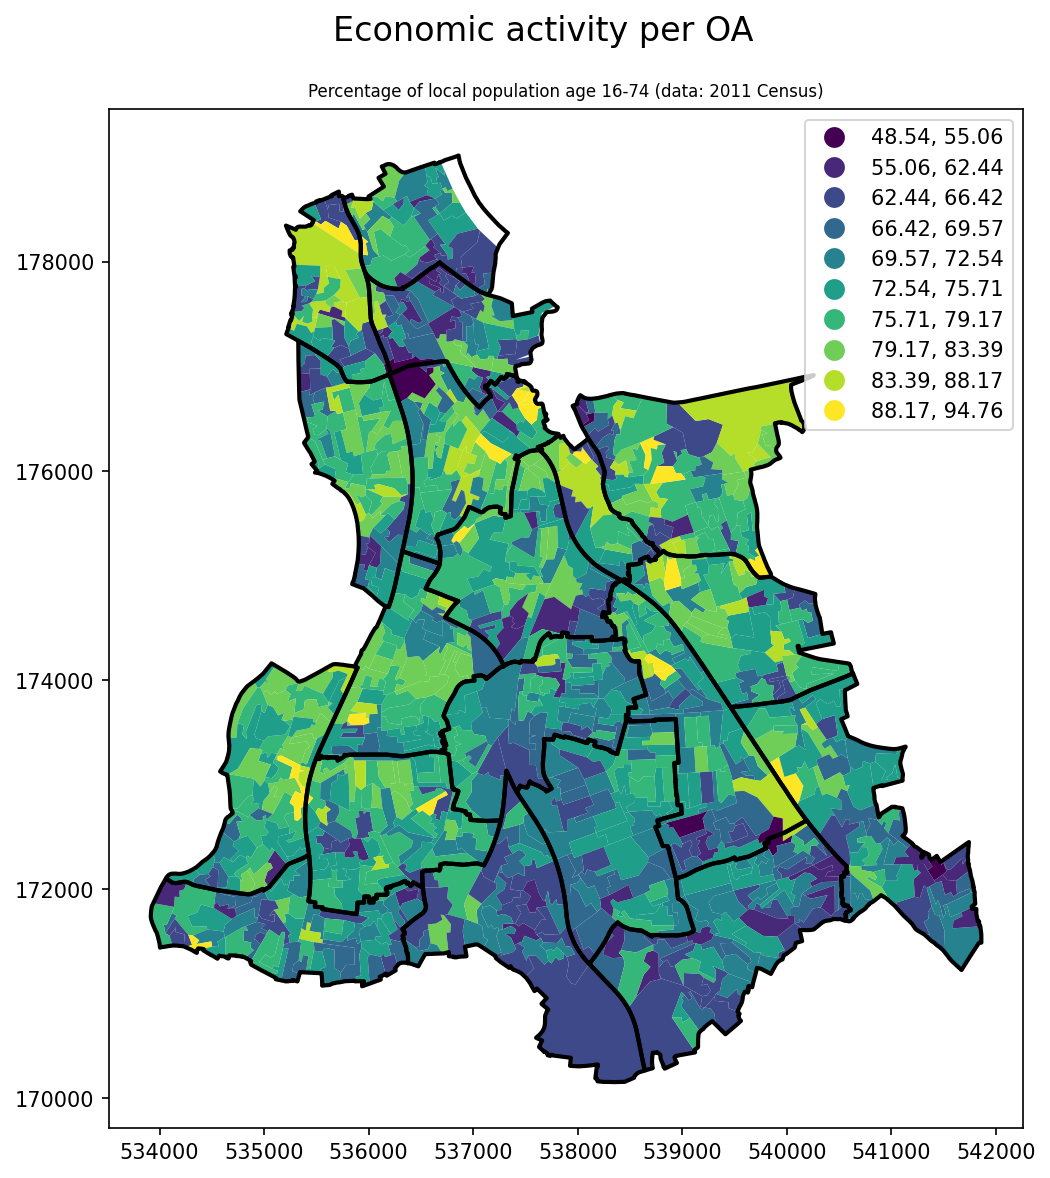

In [11]:
# To introduce a bit more visual contrast, let's try with natural breaks

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Economic activity per OA', fontsize=16, y=.95)
plt.title('Percentage of local population age 16-74 (data: 2011 Census)', fontsize=8)
ea_oa_geom.plot(ax=ax, column='% Econ. Actives', 
              legend=True,
              # mapclassify parameters for breaks
              # See https://pysal.org/mapclassify/api.html
              scheme='NaturalBreaks', 
              classification_kwds={
                 'k': 10 
              },
              # legend_kwds={
              #     'labels': bin_labels
              # }
              # legend_labels=lsoa_imd.IMD_decile
              ) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

plt.savefig(f"{out_dir}/lbl_oa11_wd22_economically_actives.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_economically_actives.pdf")

At Ward level
==

In [12]:
ea_wd = pd.read_csv(f"{employment_dir}/lbl_economic_activity_groups_wd22.csv")
print(len(ea_wd))
ea_wd.columns

19


Index(['WD22CD_proposed', 'Full-time', 'Part-time', 'Self-employed',
       'Working student', 'Unemployed', 'Inactive'],
      dtype='object')

In [13]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
data = ea_wd.copy()
data['WD22NM_proposed'] = data.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
data = data.set_index('WD22NM_proposed').drop(columns='WD22CD_proposed')
data.head().round(1)

,Full-time,Part-time,Self-employed,Working student,Unemployed,Inactive
WD22NM_proposed,,,,,,
Bellingham,34.4,15.1,7.3,3.9,7.8,31.6
Blackheath,45.5,9.5,11.9,3.3,5.5,24.2
Brockley,42.6,10.1,11.1,7.5,5.2,23.6
Catford South,38.1,12.4,10.9,4.5,5.9,28.2
Crofton Park,43.7,11.5,12.7,3.2,5.3,23.5


Text(0.5, 0, '%')

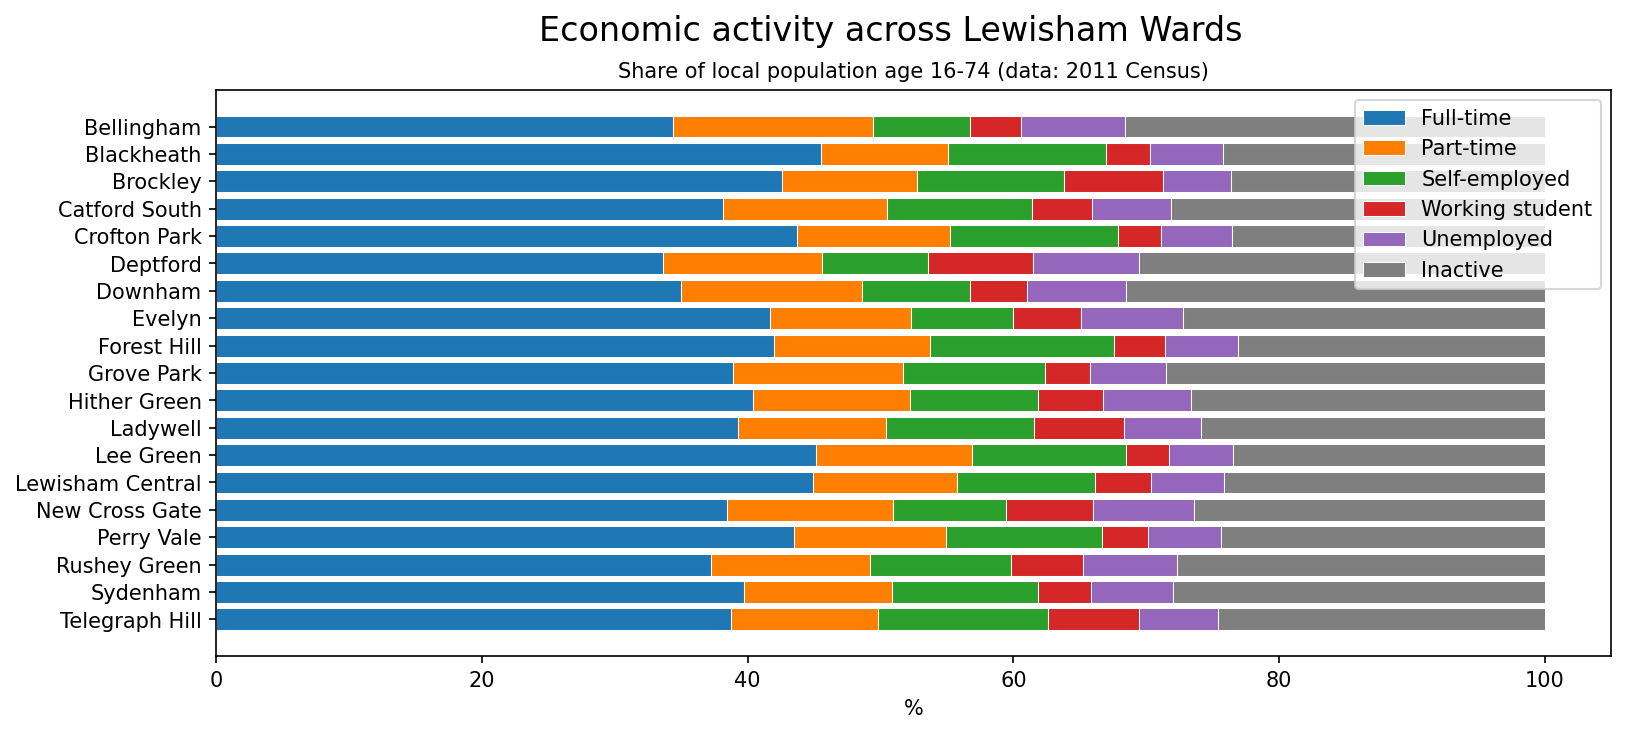

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=150)

plt.suptitle('Economic activity across Lewisham Wards', fontsize=16)
plt.title('Share of local population age 16-74 (data: 2011 Census)', fontsize=10)

# data = total.set_index('WD22NM_proposed')[months]
# data = data / data.max().max() # [0..1]
ward_names = list(reversed(data.index)) 
variable_names = data.columns

base = pd.Series(index=ward_names, data=[0]*len(ward_names))

colors = [
  '#1f77b4', # blue
  '#ff7f03', # orange
  '#2ca02c', # green
  '#d62728', # red
  '#9467bd', # purple
  '#7f7f7f', # gray
]

for idx, var in enumerate(variable_names):
  values = data[var].loc[ward_names].values
  plt.barh(y=range(len(values)),
           width=values,
           height=0.8,
           left=base.values, 
           edgecolor='white', linewidth=0.5,
           color=colors[idx],
           label=var)
  base = base + values

plt.legend(loc='upper right')

plt.yticks(range(len(ward_names)), ward_names)

plt.xlabel('%')


Occupation groups
==

In [ ]:
og_wd = pd.read_csv(f"{employment_dir}/lbl_occupation_share_wd22.csv")
og_wd['WD22NM_proposed'] = og_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
print(len(og_wd))
og_wd.head()

19


,WD22CD_proposed,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,8. Process plant and machine operatives,9. Elementary occupations,WD22NM_proposed
0,E05013714,6.304648,13.161528,11.021629,12.816383,10.699494,14.404050,10.837552,6.672803,14.081914,Bellingham
1,E05013715,13.279727,31.079435,19.809942,10.294834,4.751462,6.359649,5.287524,2.339181,6.798246,Blackheath
2,E05013716,10.391391,25.287478,21.109822,10.612934,6.118789,8.028273,6.772866,2.194324,9.484123,Brockley
3,E05013717,9.075160,19.936034,12.446695,14.472281,9.928038,9.834755,9.768124,5.050640,9.488273,Catford South
4,E05013718,10.894796,27.293149,19.031574,11.818295,7.076001,7.387995,5.778111,3.357045,7.363035,Crofton Park


In [ ]:
import seaborn as sns

In [ ]:
data = og_wd.drop(columns='WD22CD_proposed').set_index('WD22NM_proposed')#.transpose()
data.head()

,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,8. Process plant and machine operatives,9. Elementary occupations
WD22NM_proposed,,,,,,,,,
Bellingham,6.304648,13.161528,11.021629,12.816383,10.699494,14.404050,10.837552,6.672803,14.081914
Blackheath,13.279727,31.079435,19.809942,10.294834,4.751462,6.359649,5.287524,2.339181,6.798246
Brockley,10.391391,25.287478,21.109822,10.612934,6.118789,8.028273,6.772866,2.194324,9.484123
Catford South,9.075160,19.936034,12.446695,14.472281,9.928038,9.834755,9.768124,5.050640,9.488273
Crofton Park,10.894796,27.293149,19.031574,11.818295,7.076001,7.387995,5.778111,3.357045,7.363035


Text(50.83333333333332, 0.5, '')

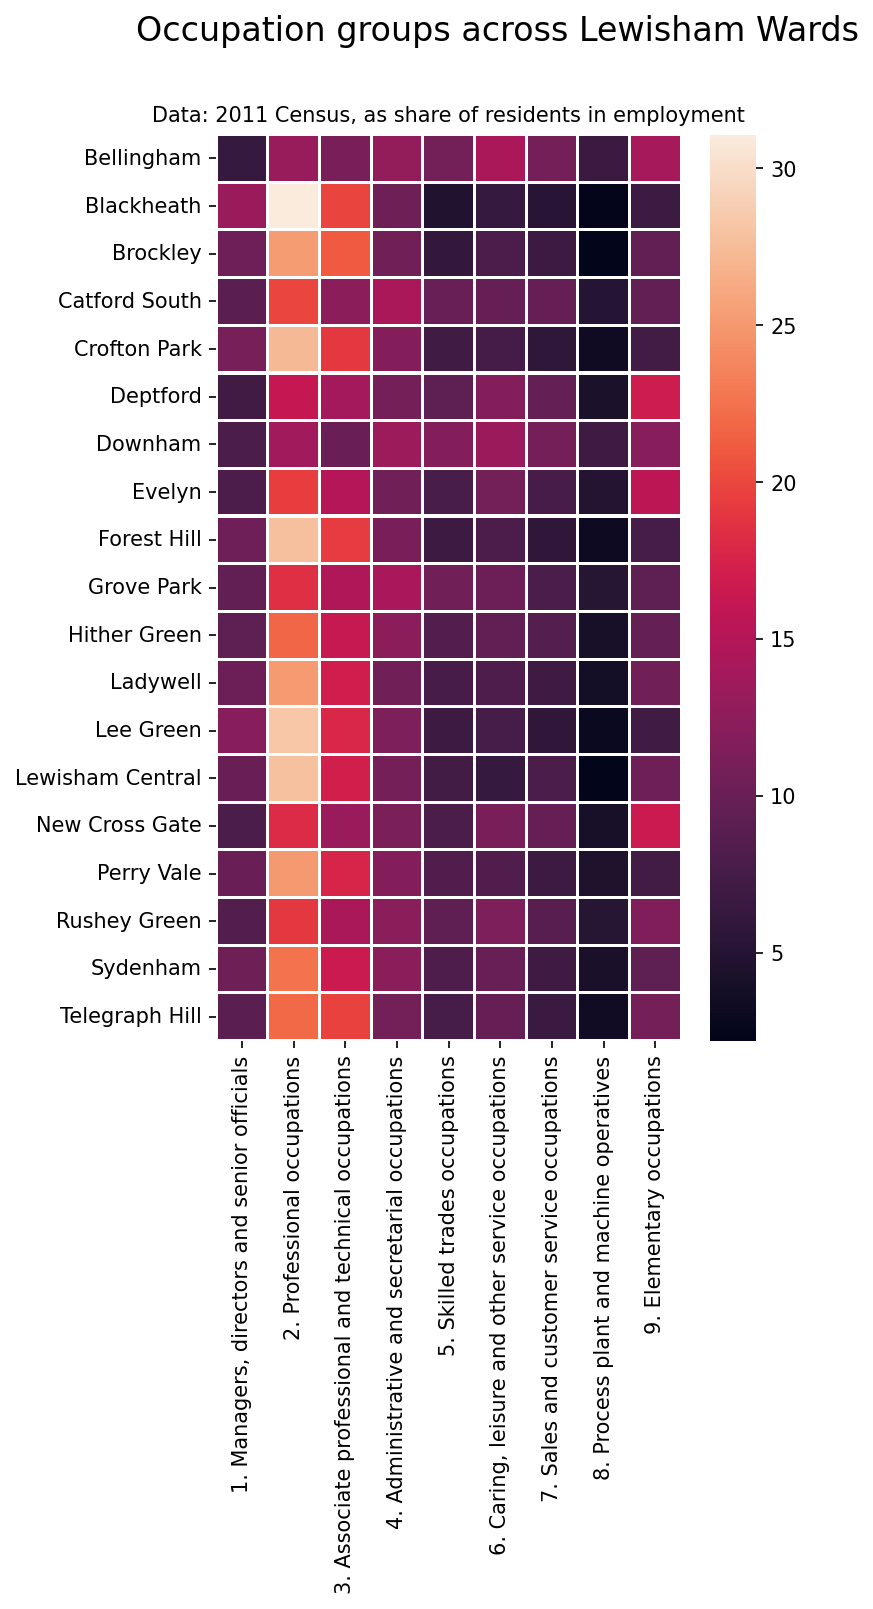

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8), dpi=150)

plt.suptitle('Occupation groups across Lewisham Wards', fontsize=16)
plt.title('Data: 2011 Census, as share of residents in employment', fontsize=10)

ward_names = list(data.index) 
variable_names = data.columns

sns.heatmap(data[variable_names].loc[ward_names], linewidth=1 , annot=False)
plt.xticks(rotation=90)
plt.ylabel('')